In [1]:
# Many EEG signals including biological artifacts reflect non-Gaussian processes.
# Therefore PCA-based artifact rejection will likely perform worse at separating the signal from noise sources.
# Example:Imagine 3 instruments playing simultaneously and 3 microphones recording mixed signals.
# ICA can be used to recover the sources, what is played by each instrument

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

In [3]:
np.random.seed(0) #set seed for reproducible results
n_samples = 2000
time = np.linspace(0, 8, n_samples)

In [4]:
s1 = np.sin(2 * time) # Signal 1:sinusoidal signal
s2 = np.sign(np.sin(3 * time)) # Signal 2:square signal
s3 = signal.sawtooth(2 * np.pi * time) # Signal 3:sawtooth signal

In [5]:
S = np.c_[s1,s2,s3]
S += 0.2 * np.random.normal(size=S.shape) # Add noise

In [6]:
S /= S.std(axis=0) # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0],[1.5, 1.0, 2.0]]) #Mixing matrix
X = np.dot(S, A.T) #Generate observations

In [7]:
X

array([[-0.74486315, -0.91401507, -1.81570038],
       [ 0.03932519,  1.06492993, -1.58715033],
       [-0.40766041,  0.39786915, -1.90998106],
       ...,
       [ 0.23856791, -0.28486909,  1.38619226],
       [-0.00653213, -0.99317023,  1.48134842],
       [-3.00301507, -3.62816891, -4.8258685 ]])

In [8]:
# compute ICA
ica = FastICA(n_components = 3)
S_ = ica.fit_transform(X) #get the estimated sources
A_ = ica.mixing_ #get estimated mixing matrix

# compute PCA
pca = PCA(n_components = 3)
H = pca.fit_transform(X) #estimate PCA sources
plt.figure(figsize=(9, 6))

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

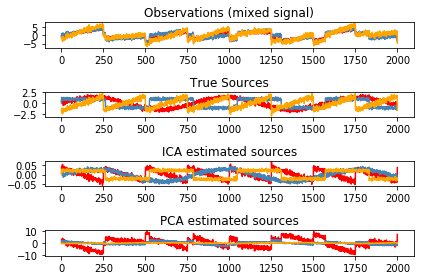

In [9]:
models = [X,S,S_,H]
names = ['Observations (mixed signal)', 'True Sources',
        'ICA estimated sources', 'PCA estimated sources']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color = color)
plt.tight_layout()
plt.show()

In [10]:
# PCA fails at recovering our "Instruments" since the related signals reflect non-Gaussian processes.

In [82]:
# EEG data
import mne
from mne.preprocessing import ICA, create_ecg_epochs
from mne.datasets import sample
data = mne.io.read_raw_edf('sub1_1_filtered.edf', preload=True)
# data.filter(1, 50, fir_design='firwin')

Extracting EDF parameters from sub1_1_filtered.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 238199  =      0.000 ...   793.997 secs...


In [83]:
print(data.info)

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | P3 - Pz, C3 - Pz, F3 - Pz, Fz - Pz, F4 - Pz, C4 - Pz, ...
    chs : list | 25 items (EEG: 24, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 150.0 Hz
    meas_date : int | 1509358228
    nchan : int | 25
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 300.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject

In [85]:
print(data.info['chs'])

[{'cal': 65534.0, 'logno': 1, 'scanno': 1, 'range': 19660.0, 'unit_mul': 0.0, 'ch_name': 'P3 - Pz', 'unit': 107, 'coord_frame': 4, 'coil_type': 1, 'kind': 2, 'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}, {'cal': 65534.0, 'logno': 2, 'scanno': 2, 'range': 19660.0, 'unit_mul': 0.0, 'ch_name': 'C3 - Pz', 'unit': 107, 'coord_frame': 4, 'coil_type': 1, 'kind': 2, 'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}, {'cal': 65534.0, 'logno': 3, 'scanno': 3, 'range': 19660.0, 'unit_mul': 0.0, 'ch_name': 'F3 - Pz', 'unit': 107, 'coord_frame': 4, 'coil_type': 1, 'kind': 2, 'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}, {'cal': 65534.0, 'logno': 4, 'scanno': 4, 'range': 19660.0, 'unit_mul': 0.0, 'ch_name': 'Fz - Pz', 'unit': 107, 'coord_frame': 4, 'coil_type': 1, 'kind': 2, 'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}, {'cal': 65534.0, 'logno': 5, 'scanno': 5, 'range': 19660.0, 'unit_mul': 0.0, 'ch_name': 'F4 - Pz', 'unit': 107,

In [72]:
montage = mne.channels.read_montage('C:\\Users\\jhpark\\Documents\\GitHub\\Python_project\\EEG\\BP_channelLocs.locs', ch_names=['FP1','FPz','FP2','F7','F3','Fz','F4','F8','FC9','FC5','FC1','FC2','FC6','FC10','T7','C3','Cz','C4','T8','TP9','CP5','CP1','CP2','CP6','TP10','P7','P3','Pz','P4','P8','O1','Oz','O2'], path=None)

In [73]:
data.set_montage(montage)

The following EEG sensors did not have a position specified in the selected montage: ['CM - Pz', 'A1 - Pz', 'T3 - Pz', 'T5 - Pz', 'X3 - Pz', 'X2 - Pz', 'X1 - Pz', 'A2 - Pz', 'T6 - Pz', 'T4 - Pz']. Their position has been left untouched.


<ipython-input-73-35f4347ba5d0>:1: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['CM - Pz', 'A1 - Pz', 'T3 - Pz', 'T5 - Pz', 'X3 - Pz', 'X2 - Pz', 'X1 - Pz', 'A2 - Pz', 'T6 - Pz', 'T4 - Pz']. Their position has been left untouched.
  data.set_montage(montage)


<RawEDF  |  sub1_1_filtered.edf, n_channels x n_times : 25 x 238200 (794.0 sec), ~45.5 MB, data loaded>

In [74]:
picks_eeg = mne.pick_types(data.info, meg=False, eeg=True, eog=False,
                           stim=False, exclude='bads')

In [75]:
method = 'fastica'

In [76]:
# Chosse other parameters
n_components = 20 # if float, select n_components by explained variance of PCA
decim = 3  # we need sufficient statistics, not all time points -> saves time

# we will also set state of the random number generator - ICA is a
# non-deterministic algorithm, but we want to have the same decomposition
# and the same order of components each time this tutorial is run
random_state = 23
ica = ICA(n_components=n_components, method=method, random_state=random_state)

In [77]:
reject = dict(mag=5e-12, grad=4000e-13)
ica.fit(data, decim=decim, reject=reject)
print(ica)

Fitting ICA to data using 24 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 20 components
Fitting ICA took 1.8s.
<ICA  |  raw data decomposition, fit (fastica): 79400 samples, 20 components, channels used: "eeg">


In [78]:
ica.plot_components()
## BP locs를 불러오지 못해서 오류뜸.....

ValueError: The following electrodes have overlapping positions, which causes problems during visualization:
CM , A1 , T3 , T5 , X3 , X2 , X1 , A2 , T6 , T4 